In [9]:
# importing the data

import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("C:/Users/Boston/Documents/Kaggle/Titanic/train.csv")


In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.info()

# there are 891 entries in this data which is very small
#there are four 'object' data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [31]:
data.describe()

C:\Users\Boston\Anaconda3a\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
data["Ticket"].value_counts()


CA. 2343              7
1601                  7
347082                7
CA 2144               6
347088                6
3101295               6
S.O.C. 14879          5
382652                5
W./C. 6608            4
PC 17757              4
2666                  4
113760                4
LINE                  4
113781                4
19950                 4
17421                 4
4133                  4
347077                4
349909                4
345773                3
SC/Paris 2123         3
F.C.C. 13529          3
230080                3
C.A. 31921            3
PC 17755              3
PC 17760              3
29106                 3
239853                3
371110                3
363291                3
                     ..
244358                1
345769                1
244310                1
248698                1
315093                1
PC 17600              1
SC/PARIS 2131         1
SOTON/O.Q. 3101306    1
PC 17596              1
112050                1
349233          

In [14]:
data["Cabin"].value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
D                  3
F33                3
F2                 3
C22 C26            3
E101               3
B28                2
D36                2
C93                2
C52                2
B22                2
C78                2
C126               2
F4                 2
D20                2
C123               2
C124               2
B49                2
B58 B60            2
E8                 2
B77                2
B57 B59 B63 B66    2
B20                2
B35                2
D17                2
E33                2
B51 B53 B55        2
C83                2
                  ..
D48                1
E63                1
D49                1
E12                1
C7                 1
D10 D12            1
E31                1
C95                1
E34                1
C32                1
E50                1
B101               1
B69                1
B39                1
B50                1
C118               1
F G63        

In [15]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# also it is worth noting that 2 entries of  Embarked is missing
# 687 rows of cabin are missing
# 185 rows of Age are missing

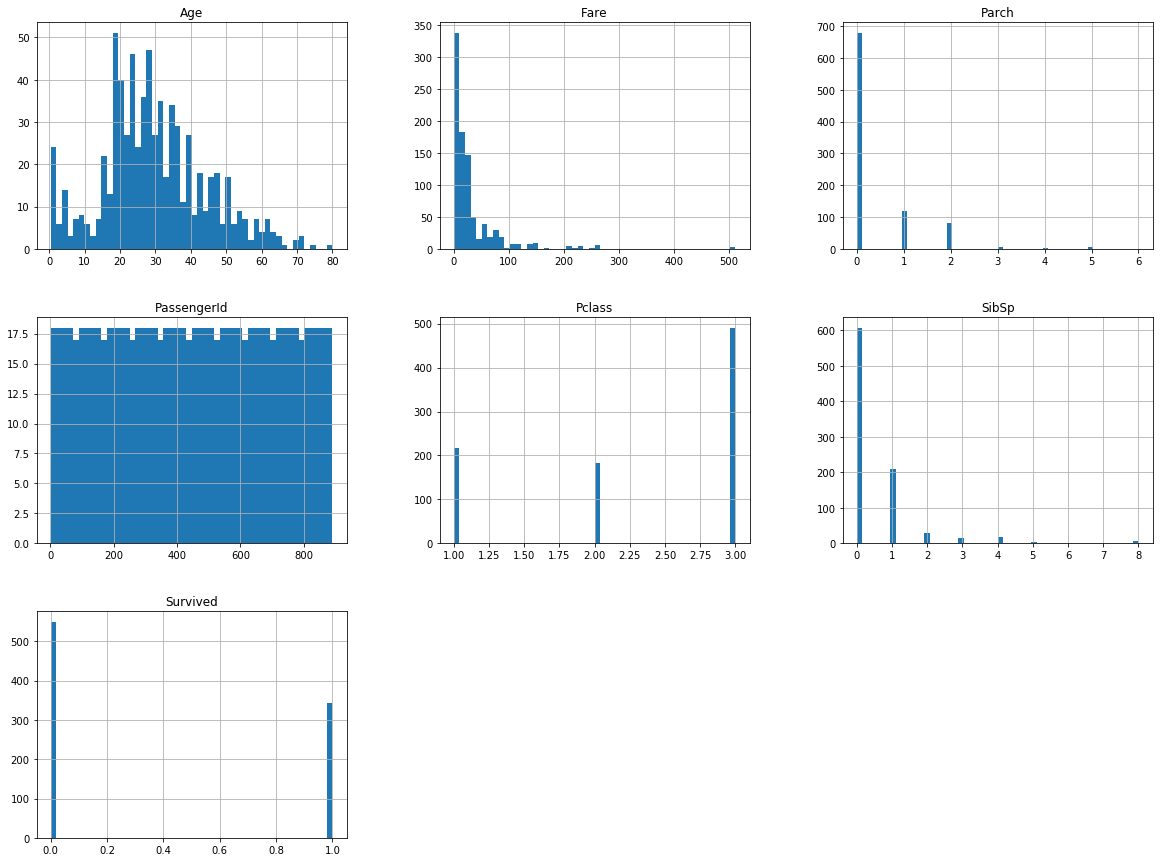

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt
data.hist(bins=50,figsize=(20,15))
plt.show()


In [20]:
# the age is slightly tail heavy and so is the fair , the histograms arent to informative for anything else

# Corrolation checking

In [24]:
corr_matrix = data.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [25]:
# there is fairly considerable corrolation between Fare and P class and those who survived
# there is slight corrolation between Parch , Sibsp and age and those who survived
# there is almost no corrolation between passenger id and those who survived

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E42A649908>,
      dtype=object)

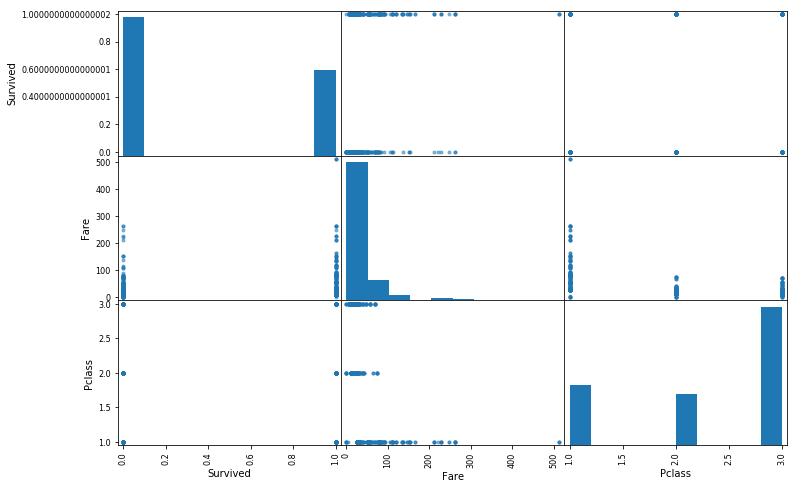

In [29]:
from pandas.tools.plotting import scatter_matrix

attributes=["Survived","Fare","Pclass"]
scatter_matrix(data[attributes],figsize=(12,8))

In [32]:
# it doesnt seem that the corrolations are of much it using the discrete variables

# data preparation

In [46]:
# using a clean training set

data_raw = data.drop("Survived",axis=1).copy()
data_labels = data["Survived"].copy()


# Data cleaning


In [47]:
# the numerical attribute age is missing 177 rows ,we can use the imputer method to help us with this

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

# the median can only be computed in numerical attributes we must do the data without the  categorical attributes


data_nume = data_raw.drop("Parch","Pclass","Sibsp", axis=1)

TypeError: drop() got multiple values for argument 'axis'